In [1]:
import re
import time
import random
import pandas as pd # 数据框操作
import numpy as np 
import matplotlib.pyplot as plt # 绘图
import jieba # 分词
from wordcloud import WordCloud # 词云可视化
import matplotlib as mpl  # 配置字体
from pyecharts import Geo # 地理图

In [2]:
mpl.rcParams["font.sans-serif"] = ["SimHei"] # SimHei   Microsoft YaHei
# 配置绘图风格
plt.rcParams["axes.labelsize"] = 16.   
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 15.]

# 数据展示部分

In [3]:
# 导入数据
data = pd.read_csv('LaGouDataPython.csv',encoding='gbk') # 导入数据
data.head()

,岗位职称,工作经验,学历要求,工作类型,公司发展,工作地点,工资,工作福利,公司名称
0,高级Python研发工程师,3-5年,本科,全职,A轮,上海,15k-30k,"商业保险,年度旅游,带薪年病假,弹性工作",贝米钱包
1,PYTHON开发工程师,1-3年,本科,全职,天使轮,上海,8k-15k,五险一金,译会科技
2,Python开发工程师,3-5年,大专,全职,上市公司,深圳,18k-25k,"团队氛围,高速发展,互联网金融,五险一金",众禄金融
3,python开发工程师,1-3年,不限,全职,不需要融资,杭州,6k-10k,"双休,五险,工作8小时,法定节假日",健培
4,Python工程师,不限,本科,全职,不需要融资,广州,10k-15k,"弹性上下班,六险一金,周末双休",武汉佰钧成技术有限公司


In [4]:
data.tail()

,岗位职称,工作经验,学历要求,工作类型,公司发展,工作地点,工资,工作福利,公司名称
429,Python技术经理,5-10年,本科,全职,未融资,北京,20k-25k,职位晋升，五险一金，绩效奖金,北京八维研修学院
430,Python研发工程师,不限,本科,全职,上市公司,杭州,15k-30k,丰厚年终奖、国外旅游、弹性时间、简单平等,美登科技
431,高级Python开发工程师,3-5年,本科,全职,A轮,武汉,15k-20k,"项目有潜力,环境舒适,团队激情,待遇丰厚",猫头鹰团队
432,Python工程师,1-3年,本科,全职,A轮,北京,8k-15k,"补充医疗,出国旅游,带薪年假,绩效奖金",掌控
433,Python开发工程师,1-3年,本科,全职,B轮,北京,8k-15k,"五险一金,生日福利,交通补,饭补",店商互联


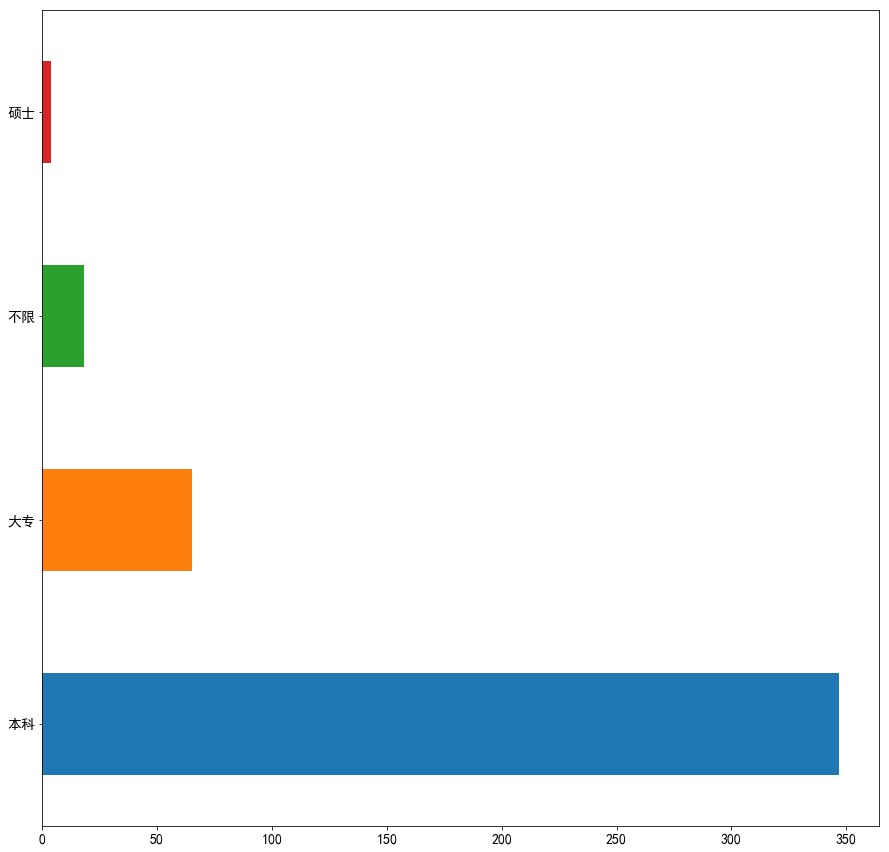

In [5]:
data['学历要求'].value_counts().plot(kind='barh',rot=0)
plt.show()

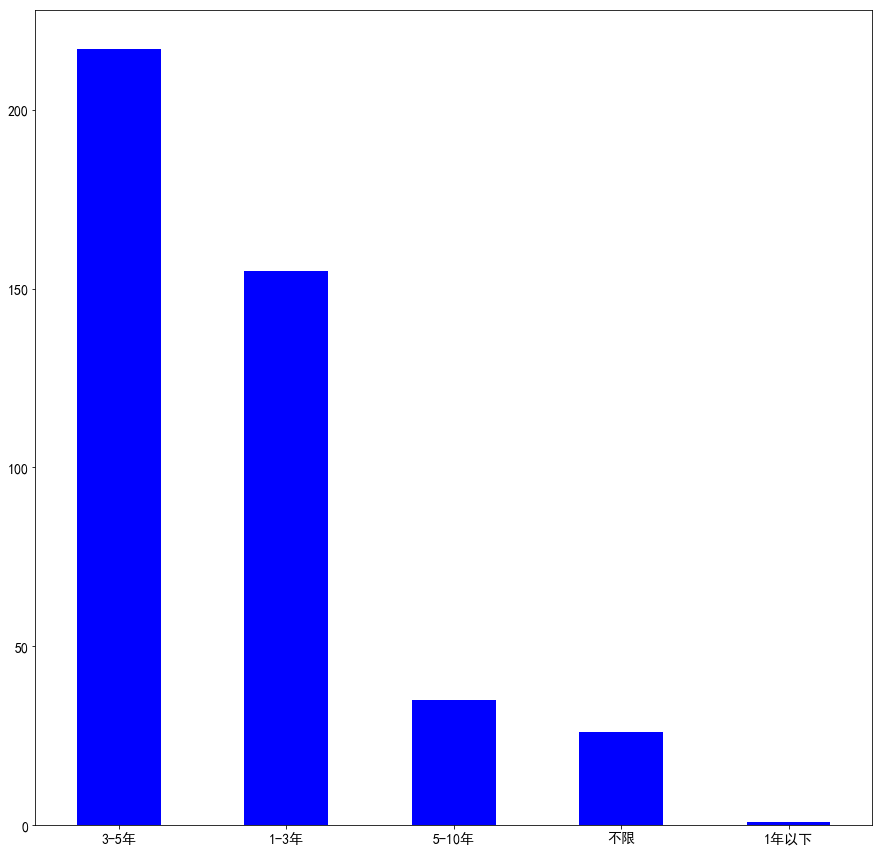

In [6]:
data['工作经验'].value_counts().plot(kind='bar',rot=0,color='b')
plt.show()

In [11]:
final = ''  
stopwords = ['PYTHON','python','Python','工程师','（','）','/'] # 停止词
for n in range(data.shape[0]):
    
    seg_list = list(jieba.cut(data['岗位职称'][n]))
   
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
# final 得到的词汇

Building prefix dict from C:\Users\19609\Anaconda3\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Users\19609\Anaconda3\lib\site-packages\jieba\dict.txt ...
Dumping model to file cache C:\Users\19609\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Dumping model to file cache C:\Users\19609\AppData\Local\Temp\jieba.cache
Loading model cost 2.7494165897369385 seconds.
DEBUG:jieba:Loading model cost 2.7494165897369385 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


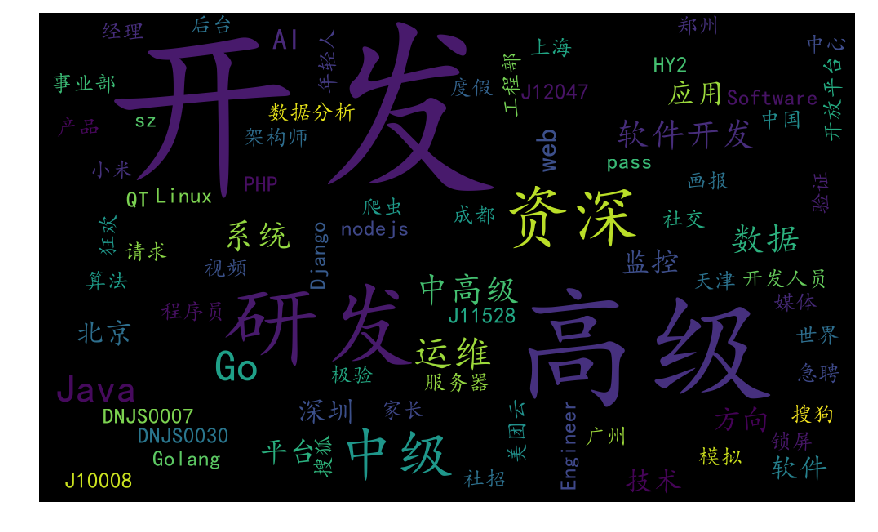

In [13]:
# 指定中文编码，否则不能显示中文
my_wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\simkai.ttf',width=1000,height=600).generate(final) 

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()


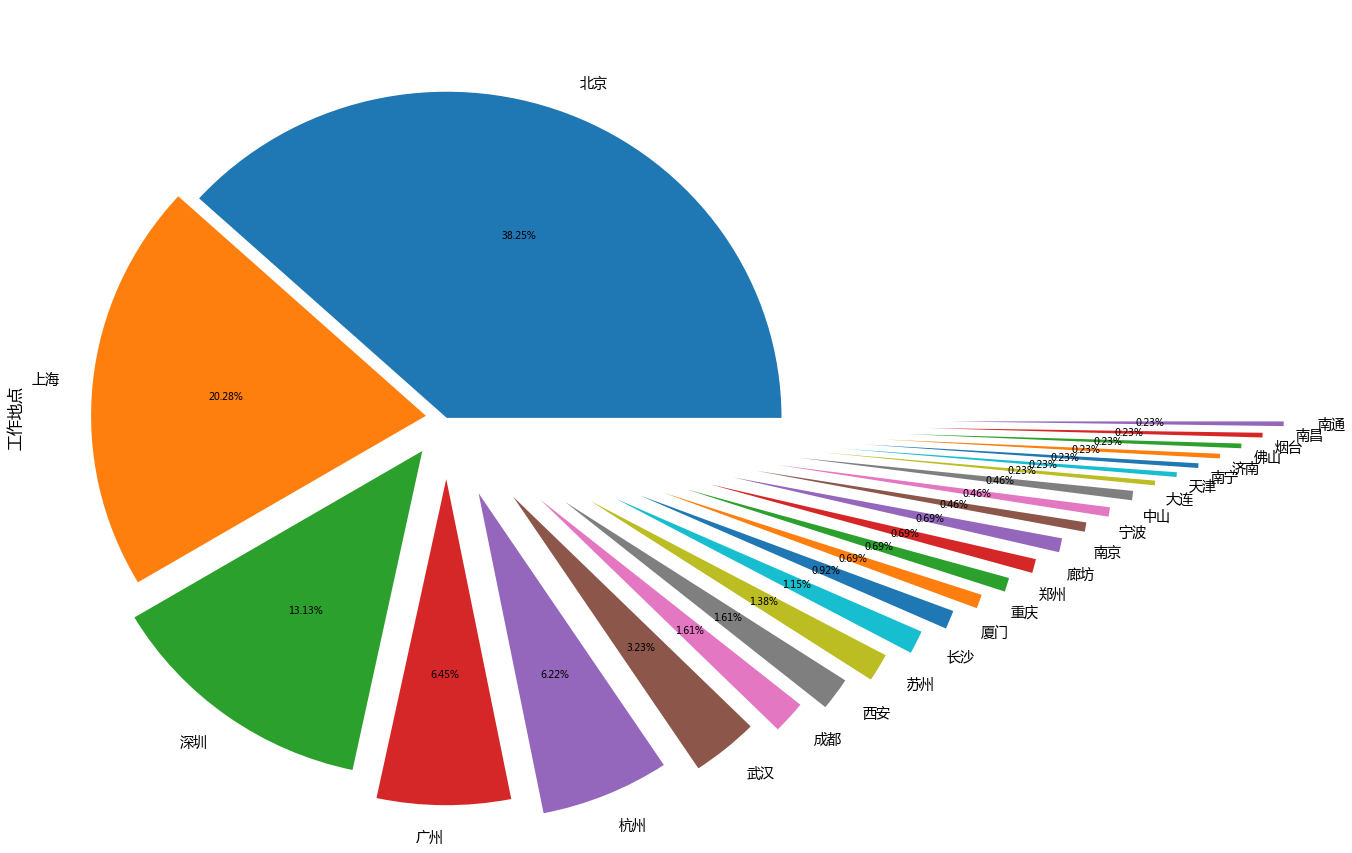

In [16]:

data['工作地点'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode = np.linspace(0,1.5,25))

plt.show()

In [12]:
# 提取数据框
data2 = list(map(lambda x:(data['工作地点'][x],eval(re.split('k|K',data['工资'][x])[0])*1000),range(len(data))))

In [16]:
# 提取价格信息
data3 = pd.DataFrame(data2)


In [14]:
# 转化成Geo需要的格式
data4 = list(map(lambda x:(data3.groupby(0).mean()[1].index[x],data3.groupby(0).mean()[1].values[x]),range(len(data3.groupby(0)))))

In [15]:
# 地理位置展示
geo = Geo("全国Python工资布局", "制作人:挖掘机小王子", title_color="#fff", title_pos="left", width=1200, height=600,
background_color='#404a59')
attr, value = geo.cast(data4)
geo.add("", attr, value, type="heatmap", is_visualmap=True, visual_range=[0, 300], visual_text_color='#fff')

In [23]:
# 中国地图Python工资，此分布是最低薪资
geo